# Preloaded code 

In [2]:
import pandas as pd
SEED = 42
# Загрузите данные из файла travel_insurance.csva
data = pd.read_csv('travel_insurance.csv')

# Проверьте данные на пропуски

data.isna().sum()

# Предобработайте категориальные переменные

data = pd.get_dummies(data, drop_first=True, dummy_na=True)
# Импортируйте функцию train_test_split
from sklearn.model_selection import train_test_split

# Подготовьте данные к обучению
# Выделите целевую переменную в отдельную переменную из датафрейма
y = data['Claim']

# Выделите признаки в отдельную переменную
X = data.drop('Claim', axis=1)

# Разбейте данные на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Выделите в отдельный лист var_num числовые признаки
var_feat = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

# Импортируйте шкалировщик  StandardScaler
from sklearn.preprocessing import StandardScaler

# Объвите шкалировщик
scaler = StandardScaler()

# Обучите шкалировщик
scaler.fit(X_train[var_feat])

# Преобразуйте обучающую выборку
X_train[var_feat] = scaler.transform(X_train[var_feat])

# Преобразуйте тестовую выборку
X_test[var_feat] = scaler.transform(X_test[var_feat])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

# Урок 1. Accuracy - метрика коварная

### Задание: расчет accuracy самостоятельно
- Посчитайте значение accuracy для модели класссификации, которая для настоящих значений y_real предсказала соответствующие значения y_pred

- Ответ: 0.7

In [3]:
y_real = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [1, 0, 1, 1, 0, 0, 0, 0, 0, 0]

### Задание: баланс классов в датасете

- Посчитайте частоту появления обоих классов методом value_counts(), применив его к столбцу 'Claim'. Сохраните результат в переменную class_frequency
- Визуализируйте баланс классов в виде столбцовой диаграммы. Примените к class_frequency метод plot и укажите тип диаграммы bar


In [4]:
# Посчитайте частоту появления обоих классов 
class_frequency = data['Claim'].value_counts()

# Визуализируйте баланс классов в виде столбцовой диаграммы
class_frequency.plot(kind='bar')

### Задание: обучите   модель и посчитайте метрику accuracy

- Импортируйте функцию DecisionTreeClassifier из модуля sklearn.tree
- Объявите модель
- Обучите методом fit, передав в нее тренировочные данные: матрицу с признаками и вектор целевой переменной
- Сделайте прогноз для тестовой выборки методом predict и сохраните его в переменную y_pred_tree
- Рассчитайте метрику качества на тестовой выборке и выведите на печать

In [5]:
# Импортируйте функцию DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Импортируйте метрику качества accuracy_score
from sklearn.metrics import accuracy_score
# Объявите модель
tree = DecisionTreeClassifier(random_state=SEED)
# Обучите
tree.fit(X_train, y_train)

# Сделайте прогноз для тестовой выборки 
y_pred_tree = tree.predict(X_test)
print('Качество случайного прогноза на тестовых данных = ', accuracy_score(y_test, y_pred_tree))

Качество случайного прогноза на тестовых данных =  0.969287857255645


### Задание: баланс классов в прогнозах

- Обратите y_pred_test_tree в Series функцией pd.Series()
- Посчитайте частоту появления обоих классов методом value_counts(), применив его к столбцу 'Claim'. Сохраните результат в переменную class_frequency
- Визуализируйте баланс классов в виде столбцовой диаграммы. Примените к class_frequency метод plot и укажите тип диаграммы bar


In [6]:
# Обратите y_pred_test_tree в Series
y_pred_tree = pd.Series(y_pred_test_tree)

# Посчитайте частоту появления обоих классов 
pred_class_frequency = y_pred_tree.value_counts()

# Визуализируйте баланс классов в виде столбцовой диаграммы
pred_class_frequency.plot(kind='bar')

NameError: name 'y_pred_test_tree' is not defined

### Задание: очень простое правило классификации

Создайте очень простой классификатор: любому объекту он прогнозирует класс 0 и посчитайте accuracy_score
- создайте лист/последовательность из нулей длиной, соразмерной вектору y_test
- посчитайте accuracy_score для y_test и y_test 

In [7]:
# Создайте наивный прогноз
y_pred_naive = [0]*len(y_test)
# Посчитайте метрику accuracy по этому прогнозу
print(accuracy_score(y_test, y_pred_naive))

0.9857887257224064


Вывод: что-то тут не так, раз уж все не Claim 

# Урок 2. Матрица ошибок

### Задание c выбором ответа: сколько вариантов прогнозов и настоящих классов?

- 1
- 2
- 4
- 8

Ответ: $4 = 2*2$

### Задание - подготовительное
- Сбросьте индексы y_test и возьмем значения колонки
- Соберите результаты прогнозирования и настоящих значений в одну таблицу. Передайте в функцию pd.DataFrame() словарь, где первый ключ - это 'y_test' и значения - сам y_test, а второй ключ - 'y_pred_tree' и значения y_pred_tree


In [8]:
# Сбросьте индексы y_test и возьмем значения колонки
y_test = y_test.reset_index()['Claim']
# Соберите результаты прогнозирования и настоящих значений в одну таблицу
results = pd.DataFrame({'y_test': y_test, 'y_pred_tree': y_pred_tree})

### Задание - сколько есть пар (1,1) - True Positive
- Посчитайте количество TP-ответов. Для этого объедините два условия: <br> 
1) такие значения колонки y_test из results, что они равны 1 <br> 
2) такие значения колонки y_pred_tree из results, что они равны 1

К объединенным условиям примените метод sum()

In [9]:
((results['y_test'] == 1) & (results['y_pred_tree'] == 1)).sum()

17

### Задание - сколько есть пар (0, 0 ) - True Negative
- Посчитайте количество TN-ответов. Для этого объедините два множества: <br> 
1) такие значения колонки y_test из results, что они равны 0 <br> 
2) такие значения колонки y_pred_tree из results, что они равны 0

К объединенным условиям примените метод sum()

In [10]:
((results['y_test'] == 0) & (results['y_pred_tree'] == 0)).sum()

12260

### Задание - сколько есть пар (1, 0 ) - False Positive

- Посчитайте количество FP-ответов. Для этого объедините два множества: <br> 
1) такие значения колонки y_test из results, что они равны 0 <br> 
2) такие значения колонки y_pred_tree из results, что они равны 1

К объединенным условиям примените метод sum()

In [11]:
((results['y_test'] == 1) & (results['y_pred_tree'] == 0)).sum()

163

### Задание - сколько есть пар (0, 1) - False Negative
- Посчитайте количество FN-ответов. Для этого объедините два множества: <br> 
1) такие значения колонки y_test из results, что они равны 1 <br> 
2) такие значения колонки y_pred_tree из results, что они равны 0

К объединенным условиям примените метод sum()

In [12]:
((results['y_test'] == 0) & (results['y_pred_tree'] == 1)).sum()

226

### Задание - составьте матрицу ошибок

С выбором вариантов ответов и разных сочетаний

1) TP = 1, TN = 6,  FP = 2, FN = 1 <br> 
2) TP = 6, TN = 1,  FP = 1, FN = 2 <br> 
3) TP = 1, TN = 6,  FP = 1, FN = 2 <br> 
4) TP = 6, TN = 1, FP = 2, FN = 1 <br> 

In [13]:
y_real = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [1, 0, 1, 1, 0, 0, 0, 0, 0, 0]

### Задание - confusion matrix из sklearn
- Импортируйте функцию confusion_matrix из модуля sklearn.metrics 
- Рассчитайте матрицу ошибок с помощью функции confusion_matrix. В нее нужно передать значения y_test и y_pred_tree

<a href='https://scikit-learn.org/0.21/auto_examples/model_selection/plot_confusion_matrix.html'> Визуализация таблицы <a>

In [14]:
# Импортируйте функцию confusion_matrix
from sklearn.metrics import confusion_matrix
# Рассчитайте матрицу ошибок
confusion_matrix(y_test, y_pred_tree)

array([[12260,   226],
       [  163,    17]])

# Тема 3. Recall, Precision, F1-score

### Задание - Recall - руками

Посчитайте метрику recall

In [15]:
y_real = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [1, 0, 1, 1, 0, 0, 0, 0, 0, 0]

### Задание - Recall
- Импортируйте функцию recall_score из модуля sklearn.metrics 
- Рассчитайте метрику recall с помощью функции recall_score.  В нее нужно передать значения y_test и y_pred_tree

In [16]:
# Импортируйте функцию recall_score
from sklearn.metrics import recall_score
# Посчитайте метрику recall
recall_score(y_test, y_pred_tree)

0.09444444444444444

### Задание - Precision - руками

Посчитайте Precision

In [17]:
y_real = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [1, 0, 1, 1, 0, 0, 0, 0, 0, 0]

### Задание - Precision
- Импортируйте функцию precision_score из модуля sklearn.metrics 
- Рассчитайте метрику precision с помощью функции precision_score.  В нее нужно передать значения y_test и y_pred_tree

In [18]:
# Импортируйте функцию recall_score
from sklearn.metrics import precision_score
# Посчитайте метрику recall
precision_score(y_test, y_pred_tree)

0.06995884773662552

### Задание - F1-score - руками

Посчитайте F1-score

In [19]:
y_real = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [1, 0, 1, 1, 0, 0, 0, 0, 0, 0]

### Задание - F1-score 
- Импортируйте функцию f1_score из модуля sklearn.metrics 
- Рассчитайте метрику f1-score с помощью функции f1_score.  В нее нужно передать значения y_test и y_pred_tree

In [20]:
# Импортируйте функцию f1_score
from sklearn.metrics import f1_score
# Посчитайте метрику recall
f1_score(y_test, y_pred_tree)

0.08037825059101654

### Задача руками

Выберите наилучшую модель по метрике Recall
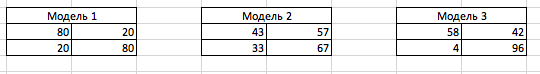

### Задача руками

Выберите наилучшую модель по метрике Precision
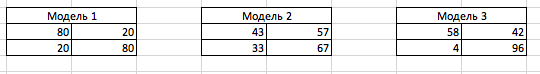

# Урок 4. Подбор алгоритма, лучшего по F1-score

### Задание
- Посчитайте f1_score для решающего дерева функцией f1_score и сохраните в переменную f1_score_tree
- Посчитайте accuracy_score для решающего дерева функцией accuracy_score и сохраните в переменную accuracy_tree
- Выведите на печать f1_score_tree
- Выведите на печать accuracy_tree

In [21]:
# Посчитайте f1_score для решающего дерева и сохраните в переменную f1_score_tree
f1_score_tree = f1_score(y_test, y_pred_tree)
# Посчитайте accuracy_score для решающего дерева и сохраните в переменную accuracy_tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
# Выведите на печать f1_score_tree
print('F1-score:', f1_score_tree)
# Выведите на печать accuracy_tree
print('Accuracy:', accuracy_tree)

F1-score: 0.08037825059101654
Accuracy: 0.969287857255645


### Задание - обучите логистическую регрессию

- Импортируйте функцию LogisticRegression из модуля sklearn.linear_model
- Объявите модель
- Обучите
- Сделайте прогноз для тестовой выборки
- Посчитайте f1_score для логистической регрессии и сохраните в переменную f1_score_log_reg
- Посчитайте accuracy_score для логистической регрессии и сохраните в переменную accuracy_log_reg
- Выведите на печать f1_score_log_reg
- Выведите на печать accuracy_log_reg

In [22]:
# Импортируйте функцию LogisticRegression
from sklearn.linear_model import LogisticRegression

# Объявите модель 
log_reg = LogisticRegression()

# Обучите
log_reg.fit(X_train, y_train)

# Сделайте прогноз для тестовой выборки
y_pred_test_log_reg = log_reg.predict(X_test)

# Посчитайте f1_score для логистической регрессии и сохраните в переменную f1_score_log_reg
f1_score_log_reg = f1_score(y_test, y_pred_test_log_reg)

# Посчитайте accuracy_score для решающего дерева и сохраните в переменную accuracy_tree
accuracy_log_reg = accuracy_score(y_test, y_pred_test_log_reg)

# Выведите на печать f1_score_log_reg
print('F1-score:', f1_score_log_reg)
# Выведите на печать accuracy_log_reg
print('Accuracy:', accuracy_log_reg)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1-score: 0.0
Accuracy: 0.9857887257224064


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Задание - обучите случайный лес

In [23]:
# Импортируйте функцию RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Объявите модель
rf = RandomForestClassifier(random_state=SEED)
# Обучите
rf.fit(X_train, y_train)

# Сделайте прогноз для тестовой выборки
y_pred_test_rf = rf.predict(X_test)

# Посчитайте f1_score для случайного леса и сохраните в переменную f1_score_rf
f1_score_rf = f1_score(y_test, y_pred_test_rf)
# Посчитайте accuracy для случайного леса и сохраните в переменную accuracy_rf
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
# Выведите на печать f1_score_rf
print('F1-score:', f1_score_rf)
# Выведите на печать accuracy_rf
print('Accuracy:', accuracy_rf)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F1-score: 0.039999999999999994
Accuracy: 0.9848413074372335


### Задание 
Оформим в виде таблицы
- Создайте лист models_list с названиями моделей ['Логистическая регрессия', 'Решающее дерево', 'Случайный лес']
- Создайте лист accuracy_list со значениями accuracy для соответствующих моделей  [accuracy_log_reg, accuracy_tree, accuracy_rf]
- Создайте лист f1_score_list со значениями f1_score для соответствующих моделей  [f1_score_log_reg, f1_score_tree, f1_score_rf]
- Соберите в словарь metrics_dict, в котором будут три ключа: model, accuracy и f1_score с соответствующими листами-значениями
- Создайте датафрейм metrics_df из этого словаря metrics_dict
- Выведите на печать датафрейм metrics_df

In [24]:
# Создайте лист models_list с названиями моделей 
models_list = ['Логистическая регрессия', 'Решающее дерево', 'Случайный лес']
# Создайте лист accuracy_list со значениями accuracy для соответствующих моделей
accuracy_list = [accuracy_log_reg, accuracy_tree, accuracy_rf]
# Создайте лист f1_score_list со значениями f1_score для соответствующих моделей
f1_score_list = [f1_score_log_reg, f1_score_tree, f1_score_rf]
# Соберите в словарь metrics_dict
metrics_dict = {'model': models_list,
              'accuracy': accuracy_list,
              'f1_score': f1_score_list}
# Создайте датафрейм metrics_df из этого словаря metrics_dict
metrics_df = pd.DataFrame(metrics_dict)
# Выведите на печать датафрейм metrics_df
metrics_df

,model,accuracy,f1_score
0,Логистическая регрессия,0.985789,0.000000
1,Решающее дерево,0.969288,0.080378
2,Случайный лес,0.984841,0.040000
